##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------
*-Please rename the file as "TeamXX_Assignment2.ipynb"*

***Team number:*** 6

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Vidhi Chetan Shah, Isha Pargaonkar, Vipanchi Dixit, Shreenidhi Ramaswamy, Shramana Ghosh

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A3PS2645H, 2021A3PS2803H, 2021A3PS2983H, 2021A3PS0946H, 2021A7PS1834H


This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

In [1053]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import train_test_split

In [1054]:
data=pd.read_csv('communities.csv')
data.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


In [1055]:
# we have used another csv file 'headings' to give feature names in our dataframe as they were not present in the given .csv file.
headers = pd.read_csv('headings.csv', delim_whitespace = True)
df = pd.read_csv('communities.csv', names=headers['headings'])
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [1056]:
# the dataset has 127 features and 1994 data samples
df.shape

(1994, 128)

In [1057]:
# We can remove the following features as they are non predictive features.
column = ['state','county','community','communityname','fold']
df.drop(column, axis=1,inplace=True)
df.head()

print(df.shape)
# 5 columns have been dropped and the number of features has reduced to 122.

(1994, 123)


# Handling Null values

In [1058]:
# dropping columns that have 50% null values
df = df.replace('?', np.nan)
for col in df.columns:
  if ((df[col].isnull().sum())>=1000):
    df.drop(col,axis=1,inplace=True)
print (df.shape)

(1994, 101)


We can see that the number of features has reduced to 100.

We wanted to check if a columnn had any missing values.

In [1059]:
for col in df.columns:
  if ((df[col].isnull().sum())>0):
    print(df[col])

0       0.36
1       0.22
2       0.28
3       0.36
4       0.51
        ... 
1989    0.36
1990    0.23
1991    0.22
1992    0.27
1993    0.25
Name: OtherPerCap, Length: 1994, dtype: object


OtherPerCap is the column that has few null values which need to be filled in.

In [1060]:
df['OtherPerCap'].describe()
# this feature is of object data type and it has 1 missing value. We need to convert it to float data type.

count     1993
unique      97
top          0
freq       129
Name: OtherPerCap, dtype: object

In [1061]:
# converting to float data type
df['OtherPerCap']=df['OtherPerCap'].astype(float)

In [1062]:
# filling in the missing value
mean=df['OtherPerCap'].mean()
df['OtherPerCap'] = df['OtherPerCap'].fillna(mean)

In [1063]:
print("Shape of df" ,df.shape)

Shape of df (1994, 101)


Now the null values have been handled and respective features have been dropped. The number of features has reduced from the initial 127 to 100.

# Feature Selection and Correlation

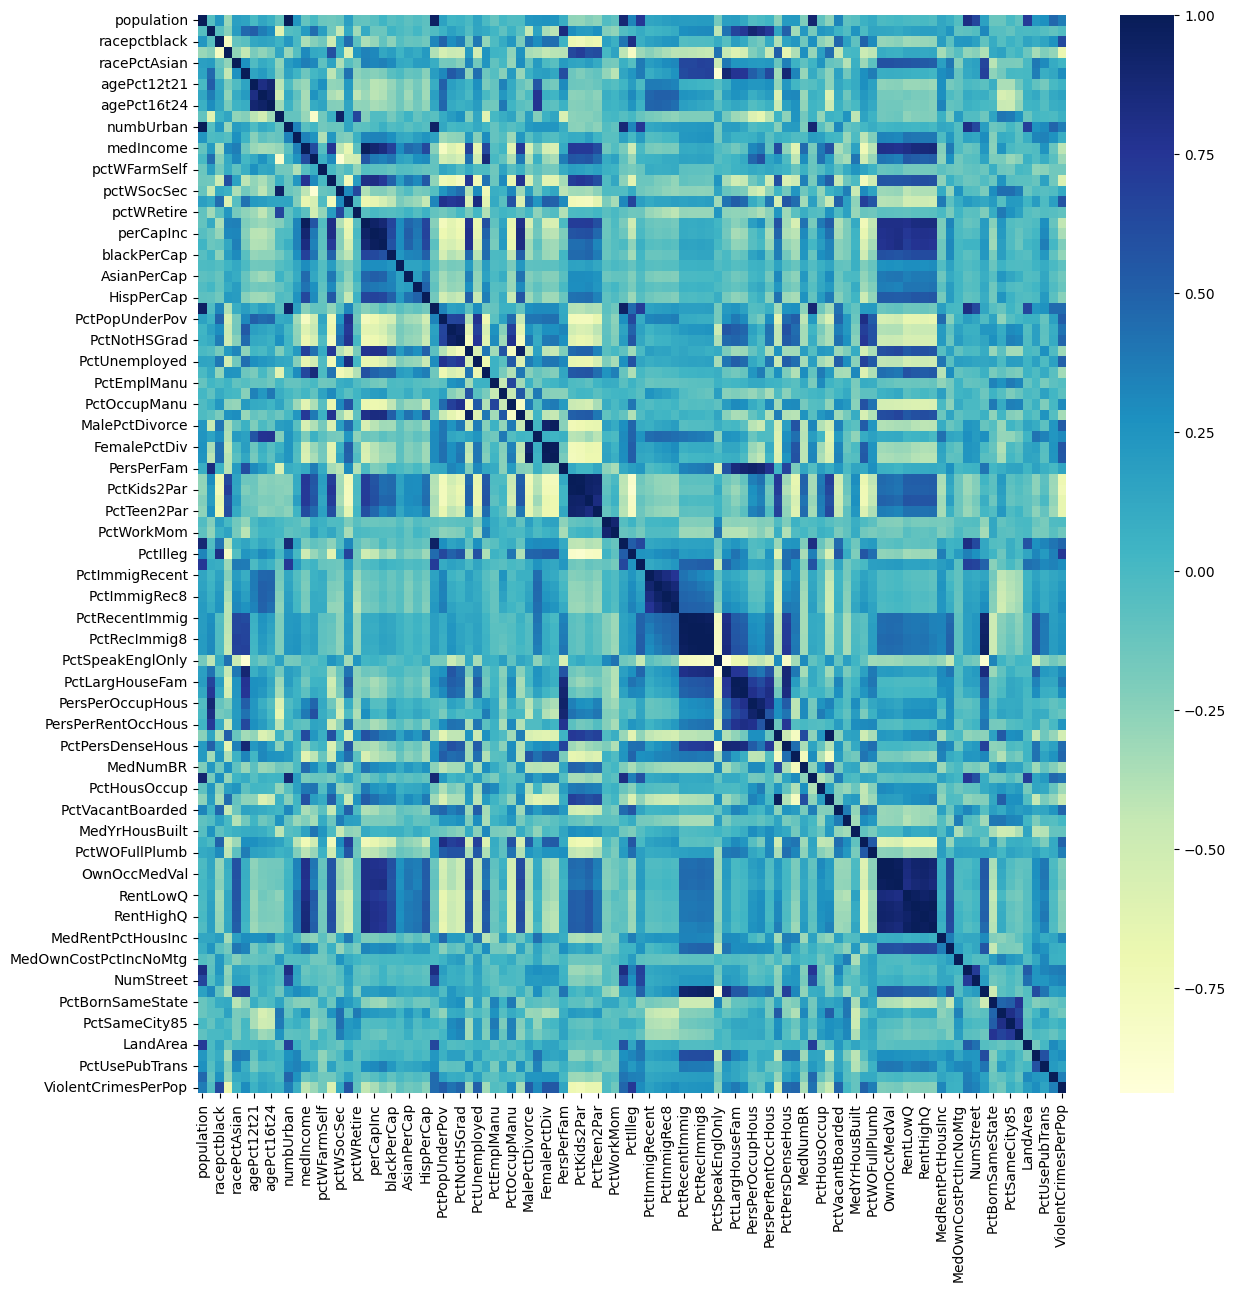

In [1064]:
# heatmap to visualize correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [1065]:
#sorted in ascending order of their correlation with 'ViolentCrimesPerPop' i.e. target variable
corr_matrix = df.corr(method = 'pearson').round(4)

corr_matrix = corr_matrix.sort_values(by=['ViolentCrimesPerPop'])
corr_matrix['ViolentCrimesPerPop']

PctKids2Par           -0.7384
PctFam2Par            -0.7067
racePctWhite          -0.6848
PctYoungKids2Par      -0.6661
PctTeen2Par           -0.6616
                        ...  
FemalePctDiv           0.5560
pctWPubAsst            0.5747
racepctblack           0.6313
PctIlleg               0.7380
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, Length: 101, dtype: float64

In [1066]:
# the 3 columns having high correlation (greater than +/-0.7) have been dropped
dropped = ['PctKids2Par','PctFam2Par','PctIlleg']
df.drop(dropped,axis=1,inplace=True)
print("Shape of df = " ,df.shape)
# the number of features has now reduced to 97

Shape of df =  (1994, 98)


In [1067]:
# Splitting into target and data values
X = df.iloc[:, 0:97].values
y = df.iloc[:, 97].values

# Performing Principal Component Analysis (Dimensionality Reduction)

Data Standardization and Scaling

In [1068]:
# Standardizing the data such that it has a mean of 0 and unit varience before performing PCA.
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [1069]:
scale_model = StandardScaler()
scale_model.fit(X)
X_scaled = scale_model.transform(X)

Discretizing the Data

In [1070]:
# discretizing the target variable into 4 classes
def disc_crime(x):
      if 0<=x<=0.07:
        return 1
      elif x<=0.18:
        return 2
      elif x<=0.4:
        return 3
      elif x<=1:
        return 4
df["Classes"] = df["ViolentCrimesPerPop"].apply(lambda x: disc_crime(x))

In [1071]:
count=0
for i in df['ViolentCrimesPerPop'].values:
  if 0.18<i<=0.4:
    count+=1
print("In (0.18,0.4], there are ",count, " values")

In (0.18,0.4], there are  507  values


When calculated in a similar way, the number of values in each 'class' are:

1. [0,0.07] = 547 values
2. (0.07,0.18] = 566 values
3. (0.18,0.4] = 507 values
4. (0.4,1] = 374 values

In [1072]:
df['Classes']
print("Shape of dataframe" ,df.shape) # As we have added the 'Classes column too, there are 99 columns in df now.
y = df.iloc[:, 98].values # setting target variable to 'Classes'

Shape of dataframe (1994, 99)


Performing PCA

In [1073]:
class PCA:

    def __init__(self, no_components):
        self.no_components = no_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # making the mean 0 i.e. mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # caclculating covarience
        covar = np.cov(X.T)

        # calculating eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(covar)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sorting eigenvectors
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[index]

        self.components = eigenvectors[:self.no_components]

    def transform(self, X):
        # projecting the data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [1074]:
pca_func = PCA(36)  # setting principal components to 35
pca_func.fit(X_scaled)
X_projected = pca_func.transform(X_scaled)

print("Shape of X:", X_scaled.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (1994, 97)
Shape of transformed X: (1994, 36)


The number of features have reduced to 36. These features will be used to train the models.

# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

In [1075]:
y=df['Classes'].values
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=42)

In [1076]:
from collections import Counter

class Node:
    def __init__(self, feature=None, thresh=None, left=None, right=None,*,value=None):
      # Intializing a node in a decision tree
        self.feature = feature  # Feature index for splitting at this node
        self.thresh = thresh    # Threshold value for the feature split
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples=10, depth_max=5, num_feat=None):
        self.min_samples=min_samples
        self.depth_max=depth_max
        self.num_feat=num_feat
        self.root=None # Intialize the root of decision tree

    def fit(self, X, y):
        self.num_feat = X.shape[1] if not self.num_feat else min(X.shape[1],self.num_feat)
        self.root = self._grow_tree(X, y) # Building the decision tree

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria check
        if (depth>=self.depth_max or n_labels==1 or n_samples<self.min_samples):
            leaf_value = self.common_label(y)
            return Node(value=leaf_value)

        # Randomly select feature indices for splitting
        feat_idxs = np.random.choice(n_feats, self.num_feat, replace=False)

        # Finding the best feature and threshold for splitting
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # Recursively grow child nodes for the left and right splits
        l_idxs, r_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[l_idxs, :], y[l_idxs], depth+1)
        right = self._grow_tree(X[r_idxs, :], y[r_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right) # Return a node representing the best split


    def _best_split(self, X, y, feat_idxs):
        # Initialize variables to store best gain, split index, and threshold
        best_gain = -1
        split_idx, split_thresh = None, None

        # Iterate through the selected feature indices
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresh = np.unique(X_column)

            for thr in thresh:
                # calculate the information gain
                gain = self.info_gain(y, X_column, thr)

                # Update the best gain, split index, and threshold if gain is higher
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = thr

        return split_idx, split_thresh # Return the index of the best feature and its corresponding threshold


    def info_gain(self, y, X_column, thresh):
        # Calculating the entropy of parent node
        parent_entropy = self._entropy(y)

        # Spitting the data based on the threshold
        l_idxs, r_idxs = self._split(X_column, thresh)

        if len(l_idxs) == 0 or len(r_idxs) == 0:
            return 0 # If a child node is empty, return 0 information gain

        # Calculating the weighted average entropy of the children nodes
        n = len(y)
        n_l, n_r = len(l_idxs), len(r_idxs)
        e_l, e_r = self._entropy(y[l_idxs]), self._entropy(y[r_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # Calculating the information gain
        info_gain = parent_entropy - child_entropy
        return info_gain

    def _split(self, X_column, split_thresh):
      # Splitting the column into indices for left and right child nodes based on the threshold
        l_idxs = np.argwhere(X_column <= split_thresh).flatten()
        r_idxs = np.argwhere(X_column > split_thresh).flatten()
        return l_idxs, r_idxs

    def _entropy(self, y):
      # Calculating the entropy of the target variable 'y'
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0]) # Compute entropy


    def common_label(self, y):
      # Finding the most common label in 'y'
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
      # Making predictions for each sample in 'X' using the decision tree
        return np.array([self.traverse_(x, self.root) for x in X])

    def traverse_(self, x, node):
        if node.is_leaf_node():
            return node.value # Return predicted value if it's a leaf node

        # Traversing left or right node based on the feature and threshold
        if x[node.feature] <= node.thresh:
            return self.traverse_(x, node.left)
        return self.traverse_(x, node.right)

In [1077]:
DT = DecisionTree(min_samples=10, depth_max=5, num_feat=None)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [1078]:
# calculating evaluation metrics

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.58
Precision: 0.57
Recall: 0.58
F1 Score: 0.57


## **_2.2 Insights drawn (plots, markdown explanations)_**

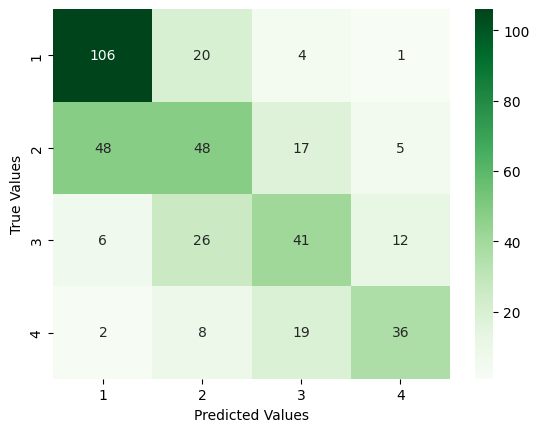

In [1079]:
#plotting the confusion matrix

cm = confusion_matrix(y_test, y_pred)
class_labels=[1,2,3,4]
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

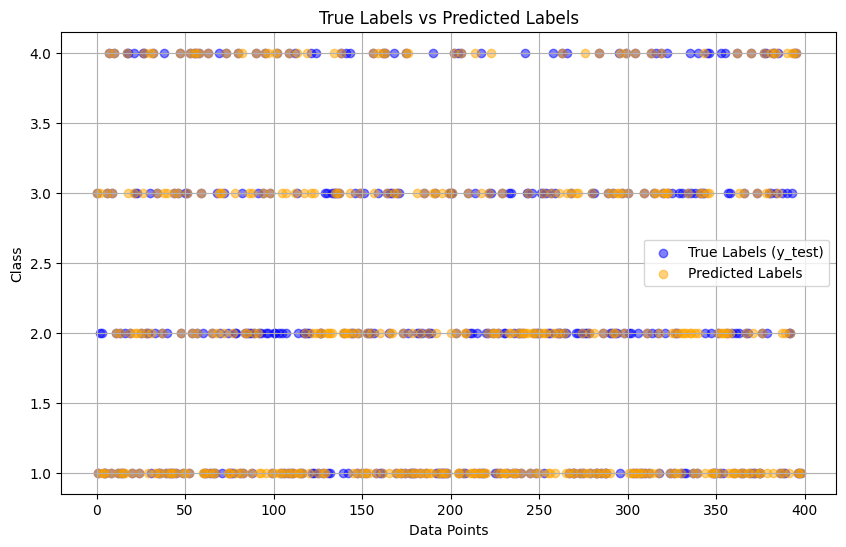

In [1080]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='True Labels (y_test)', alpha=0.5)
plt.scatter(np.arange(len(y_pred)), y_pred, color='orange', label='Predicted Labels', alpha=0.5)

plt.title('True Labels vs Predicted Labels')
plt.xlabel('Data Points')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()

**INSIGHTS**: Have organised data based of feature values, and the best feature has been identified using entropy. We can see here that despite samples for class '3' being less in number the model is able to classify it correctly. This might be because decision trees are relatively less sensitive to outliers

#***3. Adaboost***

## **_3.1 Implementation of the Model_**

In [1081]:
y=df['Classes'].values
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=42)

In [1082]:
class AdaBoost:
    def __init__(self, n_estimators=10,max_depth=1):
        self.n_estimators = n_estimators
        self.alphas = []
        self.classifiers = []
        self.classes = None
        self.max_depth=max_depth

    def fit(self, X, y):
        n, features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize weights to 1/N
        w = np.full(n, 1 / n)

        for class_i in range(n_classes):
            bin_y = np.where(y == self.classes[class_i], 1, -1)

            # Train a weak classifier (decision stump) and break if a valid weak classifier is not found
            model = DecisionStump(max_depth=self.max_depth)
            if not model.train(X, bin_y, w):
                break

            # Calculating error
            error = np.sum(w * (bin_y != model.predict(X)))

            # Avoiding division by zero
            EPS = 1e-10
            error = max(error, EPS)

            # Calculating classifier weight
            alpha = 0.5 * np.log((1.0 - error) / error)
            self.alphas.append(alpha) # alpha is classifier weight
            self.classifiers.append((class_i, model))

            # Updating weights
            w *= np.exp(-alpha * bin_y * model.predict(X))
            w /= np.sum(w)

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        class_scores = np.zeros((n_samples, n_classes))

        # Accumulating class scores from each weak classifier
        for class_i, clf in self.classifiers:
            class_scores[:, class_i] += self.alphas[class_i] * clf.predict(X)

        # Choosing the class with the highest score for each sample
        y_pred = self.classes[np.argmax(class_scores, axis=1)]

        return y_pred


class DecisionStump():
    def __init__(self,max_depth):
        self.feature_index = None
        self.threshold = None
        self.polarity = None

    def train(self, X, y, weights):
        n_samples, n_features = X.shape
        min_error = float("inf")

        for feature_i in range(n_features):
            X_column = X[:, feature_i]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                for polarity in [1, -1]:
                    predictions = np.ones(n_samples)
                    predictions[polarity * X_column < polarity * threshold] = -1

                    # Error = sum of weights of misclassified samples
                    error = np.sum(weights[y != predictions])

                    if error < min_error:
                        self.feature_index = feature_i
                        self.threshold = threshold
                        self.polarity = polarity
                        min_error = error

        # If a valid polarity is not found, return False
        return self.polarity is not None

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.ones(n_samples)

        # Correctly assigning class labels based on the polarity
        predictions[self.polarity * X[:, self.feature_index] < self.polarity * self.threshold] = -1
        return predictions.astype(int)

In [1083]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [1084]:
ada_model= AdaBoost(n_estimators=10,max_depth=1)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

In [1085]:
# calculating evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
acc = accuracy(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.41
Precision: 0.42
Recall: 0.41
F1 Score: 0.35


## **_3.2 Insights drawn (plots, markdown explanations)_**

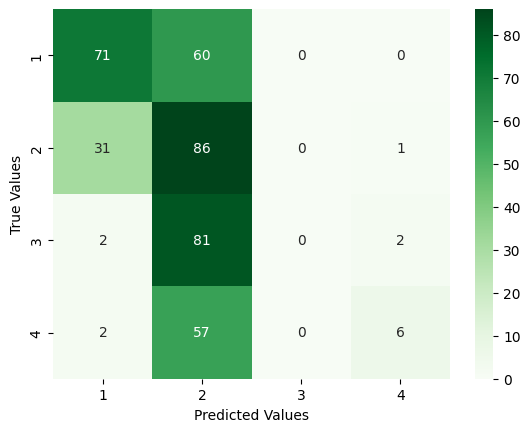

In [1086]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels=[1,2,3,4]
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

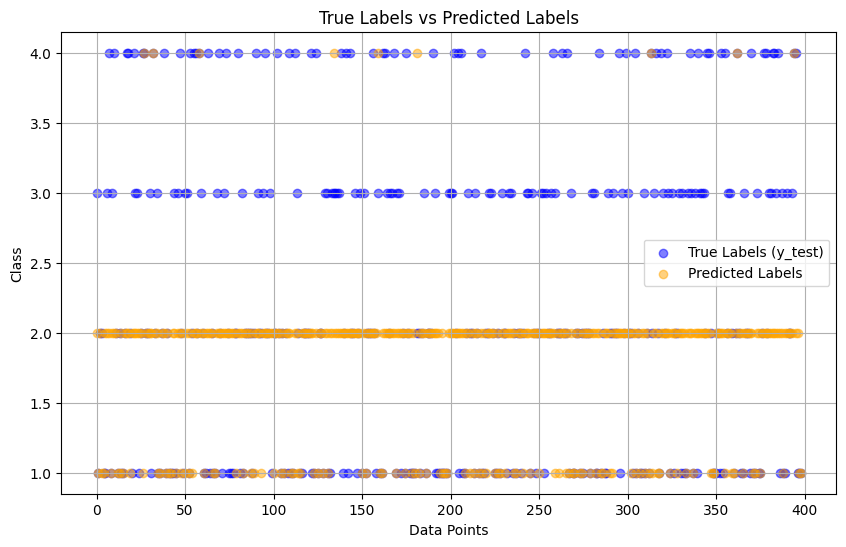

In [1087]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='True Labels (y_test)', alpha=0.5)
plt.scatter(np.arange(len(y_pred)), y_pred, color='orange', label='Predicted Labels', alpha=0.5)

plt.title('True Labels vs Predicted Labels')
plt.xlabel('Data Points')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()

**INSIGHT**:
Adaptive Boost assigns higher weights to incorrectly classified data to correct it in the later iterations. But despite this we can see that samples belonging to class '3' have not been classified correctly.The reason for this could be very less samples of class '3' present in our dataset. Maximum number of samples belong to class '1' and '2'. This could be a reason why the model predicts class '2' the most.

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

In [1088]:
y=df['Classes'].values
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=42)

In [1089]:
class MulticlassSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        # Initialize the MulticlassSVM with specified learning rate and number of epochs
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.classifiers = []   # List to store binary classifiers for each class

    def _one_vs_all(self, X, y, current_class):
        # Convert multiclass problem to binary by assigning +1 to the current class and -1 to others
        binary_y = np.where(y == current_class, 1, -1)

        # Create a binary SVM classifier for the current class
        svm = SVM(learning_rate=self.learning_rate, num_epochs=self.num_epochs)

        #Train the binary SVM classifier
        svm.train(X, binary_y)

        # Return the trained binary classifier
        return svm

    def fit(self, X, y):

        # Get unique classes in the target variable
        classes = np.unique(y)

        # Train a binary SVM classifier for each class
        for current_class in classes:
            classifier = self._one_vs_all(X, y, current_class)
            self.classifiers.append(classifier) # Store the trained binary classifier

    def predict(self, X):
        # Make predictions for each binary classifier and choose the class with the highest score
        scores = np.array([classifier.predict(X) for classifier in self.classifiers])
        return np.argmax(scores, axis=0)+1  # Return the predicted class

class SVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        # Initialize the binary SVM with specified learning rate and number of epochs
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = None
        self.b = None

    def hinge_loss(self, X, y):
        scores = np.dot(X, self.W) + self.b
        margins = 1 - y * scores
        margins[margins < 0] = 0  # ReLU activation
        loss = np.sum(margins) / X.shape[0]
        return loss

    def gradient(self, X, y):
        scores = np.dot(X, self.W) + self.b
        margin_mask = y * scores < 1
        dW = -np.dot(X[margin_mask].T, y[margin_mask]) / X.shape[0]
        db = -np.sum(y[margin_mask]) / X.shape[0]
        return dW, db

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.W = np.zeros(num_features)
        self.b = 0

        for epoch in range(self.num_epochs):
            loss = self.hinge_loss(X, y)
            dW, db = self.gradient(X, y)

            # Update weights and bias using gradient descent
            self.W -= self.learning_rate * (dW)
            self.b -= self.learning_rate * db

    def predict(self, X):
        scores = np.dot(X, self.W) + self.b
        predictions = np.sign(scores)
        return predictions.astype(int)

In [1090]:
svm_multiclass = MulticlassSVM(learning_rate=0.01, num_epochs=1000)
svm_multiclass.fit(X_train, y_train)
predictions = svm_multiclass.predict(X_test)

In [1091]:
# calculating evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.41
Precision: 0.42
Recall: 0.41
F1 Score: 0.35


## **_4.2 Insights drawn (plots, markdown explanations)_**

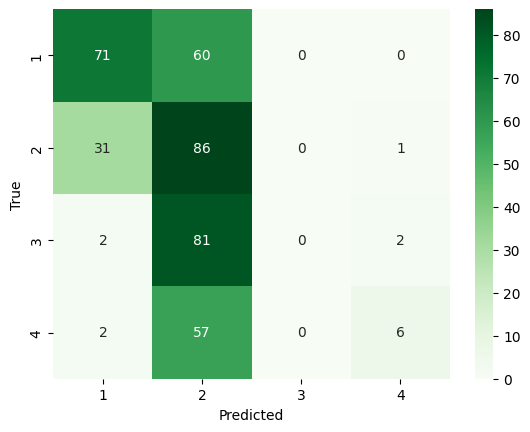

In [1092]:
cm = confusion_matrix(y_test, y_pred)
class_labels=[1,2,3,4]
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

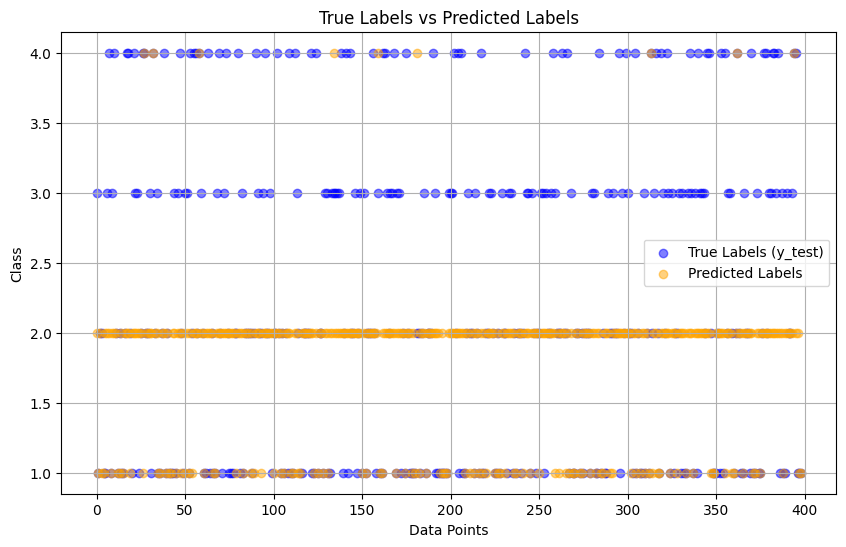

In [1093]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='True Labels (y_test)', alpha=0.5)
plt.scatter(np.arange(len(y_pred)), y_pred, color='orange', label='Predicted Labels', alpha=0.5)

plt.title('True Labels vs Predicted Labels')
plt.xlabel('Data Points')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()

**INSIGHT**: Have implemented one vs all method, and combined multiple binary classifications to a multiclass classification. Samples belonging to class '3' have not been classified correctly.The reason for this could be very less samples of class '3' present in our dataset. Maximum number of samples belong to class '1' and '2'. This could be a reason why the model predicts class '2' the most.

# CONCLUSION
The dataset initially had 127 features and one target attribute. Via preprocessing, the features reduced (feature selection) to 97 and we discretized the 'ViolentCrimesPerPop' attribute into four classes. This was further reduced to 36 components (dimensionality reduction) through PCA.

Out of the three models implemented, Decision Trees perform the best with around 60% accuracy followed by SVM having around 50% accuracy and Adaptive Boost around 40%. This could be due to the fact that Decision Trees are less sensitive to outliers compared to the other 2.

We can see that the accuracies are on a lower side because there is a skewed distribution in the original dataset i.e. there is a lack of representative samples in some classes. This is causing them to be misclassified as the model is not getting exposure to balanced training dataset.

For our models to perform better with unseen data, a more uniform dataset would be ideal.

# **_5. References_**

1.   [Adaptive Boost](https://www.youtube.com/watch?v=kho6oANGu_A)
2.   [Multi Class SVM](https://www.youtube.com/watch?v=T9UcK-TxQGw)
3. [Decision Trees](https://www.youtube.com/watch?v=_L39rN6gz7Y&t=356s)
4. [Principal Component Analysis](https://www.youtube.com/watch?v=8klqIM9UvAc&t=658s)
5. [Decision trees](https://scikit-learn.org/stable/modules/tree.html)
6. [PCA](https://www.analyticsvidhya.com/blog/2022/07/principal-component-analysis-beginner-friendly/)